In [1]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment', None)

# csv파일을 로드하여 필요한 데이터를 제외하고 제거한다음 칼럼명을 새로 설정
for i in range(3):
    num = i+18
    data_repeat = pd.read_csv('data/소년범죄_재범기간_종류20{}.csv'.format(num), index_col=0, encoding = 'cp949', engine='python')
    data_repeat = pd.DataFrame(data_repeat)
    data_repeat = data_repeat.reset_index()
    data_repeat1 = data_repeat.loc[[0, 1, 2, 3, 4, 11, 16, 25, 35, 39, 43, 60]]
    if num == 18:
        data_repeat1 = data_repeat1.rename(columns={'2018':'전체범죄건수', '2018.1':'동종재범전체건수', '2018.2':'동종1개월', 
                                           '2018.3':'동종3개월','2018.4':'동종6개월', '2018.5':'동종1년', '2018.6':'동종2년', 
                                           '2018.7':'동종3년', '2018.8':'동종3년초과','2018.9':'이종전체건수', '2018.10':'이종1개월', 
                                           '2018.11':'이종3개월', '2018.12':'이종6개월', '2018.13':'이종1년', '2018.14':'이종2년', 
                                          '2018.15':'이종3년', '2018.16':'이종3년초과'})
    elif num == 19:
        data_repeat1 = data_repeat1.rename(columns={'2019':'전체범죄건수', '2019.1':'동종재범전체건수', '2019.2':'동종1개월', 
                                           '2019.3':'동종3개월','2019.4':'동종6개월', '2019.5':'동종1년', '2019.6':'동종2년', 
                                           '2019.7':'동종3년', '2019.8':'동종3년초과','2019.9':'이종전체건수', '2019.10':'이종1개월', 
                                           '2019.11':'이종3개월', '2019.12':'이종6개월', '2019.13':'이종1년', '2019.14':'이종2년', 
                                          '2019.15':'이종3년', '2019.16':'이종3년초과'})
    elif num == 20:
        data_repeat1 = data_repeat1.rename(columns={'2020':'전체범죄건수', '2020.1':'동종재범전체건수', '2020.2':'동종1개월', 
                                           '2020.3':'동종3개월','2020.4':'동종6개월', '2020.5':'동종1년', '2020.6':'동종2년', 
                                           '2020.7':'동종3년', '2020.8':'동종3년초과','2020.9':'이종전체건수', '2020.10':'이종1개월', 
                                           '2020.11':'이종3개월', '2020.12':'이종6개월', '2020.13':'이종1년', '2020.14':'이종2년', 
                                          '2020.15':'이종3년', '2020.16':'이종3년초과'})
    data_repeat1 = data_repeat1.drop([0], axis=0)
    data_repeat1 = data_repeat1.drop([1], axis=0)
    data_repeat1 = data_repeat1.rename(columns={'범죄별(1)':'범죄종류'})
    list = ['합계', '형법범합계', '형법재산범죄', '형법강력(흉)범죄', '형법강력(폭)범죄', '형법위조범죄', '형법풍속범죄',
    '형법과실범죄', '형법기타', '특별범죄']
    data_repeat1['범죄종류'] = list
    data_repeat1 = data_repeat1.drop(columns=['범죄별(2)', '범죄별(3)'])
    data_repeat1 = data_repeat1.reset_index()
    data_repeat1 = data_repeat1.drop(columns=['index'])
    data_repeat2 = data_repeat1.drop([1, 0], axis=0)
    data_repeat3 = data_repeat2.drop(columns=['전체범죄건수', '동종재범전체건수', '이종전체건수'], axis=0)
    data_repeat3 = data_repeat3.set_index(['범죄종류'])
    data_repeat3.to_csv('data/범죄종류별_20{}.csv'.format(num), mode='w', encoding='cp949')

In [2]:
#각각의 년도별 변수를 새로 정의하고 csv파일을 저장함
for i in range(3):
    num = i+18
    globals()['data20{}'.format(num)] = pd.read_csv('data/범죄종류별_20{}.csv'.format(num), index_col=0, encoding = 'cp949', engine='python')
    if num == 18:
        data2018 = pd.DataFrame(data2018)
        data2018 = data2018.reset_index()
        data2018 = data2018.set_index(['범죄종류'])
    if num == 19:
        data2019 = pd.DataFrame(data2019)
        data2019 = data2019.reset_index()
        data2019 = data2019.set_index(['범죄종류'])
    if num == 20:
        data2020 = pd.DataFrame(data2020)
        data2020 = data2020.reset_index()
        data2020 = data2020.set_index(['범죄종류'])

In [3]:
data2018 = data2018.replace('-', 0) # 특정값을 변경하는 것은 replace()
data2019 = data2019.replace('-', 0)
data2020 = data2020.replace('-', 0)

In [4]:
index = [2018, 2019, 2020]
indexmean = [2018, 2019, 2020, 'mean']
column = ['동종1개월', '동종3개월', '동종6개월', '동종1년', '동종2년', '동종3년', '동종3년초과',
          '이종1개월', '이종3개월', '이종6개월', '이종1년', '이종2년', '이종3년', '이종3년초과']
list2 = ['형법재산범죄', '형법강력(흉)범죄', '형법강력(폭)범죄', '형법위조범죄', '형법풍속범죄',
        '형법과실범죄', '형법기타', '특별범죄']

In [5]:
# 각각의 데이터 프레임의 값을 받아 평균값과 년도별 데이터를 얻을 수 있는 코드
for x in range(len(list2)):
    for p in range(3):
        num = int(p+18)
        globals()['crim20{}'.format(num)] = []
        for i in range(14):
            if num == 18:
                crim2018.append(data2018.loc[list2[x]][i])
            elif num == 19:
                crim2019.append(data2019.loc[list2[x]][i])
            elif num == 20:
                crim2020.append(data2020.loc[list2[x]][i])

    # 데이터프레임의 타입을 변경해줘야 평균값을 계산할 수 있음.
    crim2018 = np.array(crim2018)
    crim2019 = np.array(crim2019)
    crim2020 = np.array(crim2020)
    crimMean = pd.DataFrame([crim2018, crim2019, crim2020])
    crimMean = crimMean.astype('float')

    # 평균값을 구해서 데이터 프레임 생성.
    meanlist = []
    for i in range(14):
        meanlist.append(crimMean[i].mean())

    globals()['crimall_{}'.format(x)] = pd.DataFrame([crim2018, crim2019, crim2020], columns=column, index=index)
    globals()['crimmean_{}'.format(x)] = pd.DataFrame([meanlist], columns=column, index=['mean'])

    globals()['crimmean_{}'.format(x)] = round(globals()['crimmean_{}'.format(x)], 1)
    globals()['crimall_{}'.format(x)] = round(globals()['crimall_{}'.format(x)], 1)

In [6]:
crimall_3

,동종1개월,동종3개월,동종6개월,동종1년,동종2년,동종3년,동종3년초과,이종1개월,이종3개월,이종6개월,이종1년,이종2년,이종3년,이종3년초과
2018,14,34,48,72,41,16,6,21,51,43,102,51,39,7
2019,18,27,25,61,39,21,8,17,35,37,79,56,25,11
2020,30,44,30,79,34,21,3,17,40,35,91,36,22,16


In [7]:
for i in range(len(list2)):
    globals()['crimall_{}_2018'.format(i)] = []
    globals()['crimall_{}_2019'.format(i)] = []
    globals()['crimall_{}_2020'.format(i)] = []
    for x in range(14):
        if i == 0:
            crimall_0_2018.append(crimall_0.loc[2018][x])
            crimall_0_2019.append(crimall_0.loc[2019][x])
            crimall_0_2020.append(crimall_0.loc[2020][x])
            crimall_0_2018 = [int(i) for i in crimall_0_2018]
            crimall_0_2019 = [int(i) for i in crimall_0_2019]
            crimall_0_2020 = [int(i) for i in crimall_0_2020]
        elif i == 1:
            crimall_1_2018.append(crimall_1.loc[2018][x])
            crimall_1_2019.append(crimall_1.loc[2019][x])
            crimall_1_2020.append(crimall_1.loc[2020][x])
            crimall_1_2018 = [int(i) for i in crimall_1_2018]
            crimall_1_2019 = [int(i) for i in crimall_1_2019]
            crimall_1_2020 = [int(i) for i in crimall_1_2020]
        elif i == 2:
            crimall_2_2018.append(crimall_2.loc[2018][x])
            crimall_2_2019.append(crimall_2.loc[2019][x])
            crimall_2_2020.append(crimall_2.loc[2020][x])
            crimall_2_2018 = [int(i) for i in crimall_2_2018]
            crimall_2_2019 = [int(i) for i in crimall_2_2019]
            crimall_2_2020 = [int(i) for i in crimall_2_2020]
        elif i == 3:
            crimall_3_2018.append(crimall_3.loc[2018][x])
            crimall_3_2019.append(crimall_3.loc[2019][x])
            crimall_3_2020.append(crimall_3.loc[2020][x])
            crimall_3_2018 = [int(i) for i in crimall_3_2018]
            crimall_3_2019 = [int(i) for i in crimall_3_2019]
            crimall_3_2020 = [int(i) for i in crimall_3_2020]
        elif i == 4:
            crimall_4_2018.append(crimall_4.loc[2018][x])
            crimall_4_2019.append(crimall_4.loc[2019][x])
            crimall_4_2020.append(crimall_4.loc[2020][x])
            crimall_4_2018 = [int(i) for i in crimall_4_2018]
            crimall_4_2019 = [int(i) for i in crimall_4_2019]
            crimall_4_2020 = [int(i) for i in crimall_4_2020]
        elif i == 5:
            crimall_5_2018.append(crimall_5.loc[2018][x])
            crimall_5_2019.append(crimall_5.loc[2019][x])
            crimall_5_2020.append(crimall_5.loc[2020][x])
            crimall_5_2018 = [int(i) for i in crimall_5_2018]
            crimall_5_2019 = [int(i) for i in crimall_5_2019]
            crimall_5_2020 = [int(i) for i in crimall_5_2020]
        elif i == 6:
            crimall_6_2018.append(crimall_6.loc[2018][x])
            crimall_6_2019.append(crimall_6.loc[2019][x])
            crimall_6_2020.append(crimall_6.loc[2020][x])
            crimall_6_2018 = [int(i) for i in crimall_6_2018]
            crimall_6_2019 = [int(i) for i in crimall_6_2019]
            crimall_6_2020 = [int(i) for i in crimall_6_2020]
        elif i == 7:
            crimall_7_2018.append(crimall_7.loc[2018][x])
            crimall_7_2019.append(crimall_7.loc[2019][x])
            crimall_7_2020.append(crimall_7.loc[2020][x])
            crimall_7_2018 = [int(i) for i in crimall_7_2018]
            crimall_7_2019 = [int(i) for i in crimall_7_2019]
            crimall_7_2020 = [int(i) for i in crimall_7_2020]


In [8]:
for i in range(len(list2)):
    globals()['crimmean_{}_0'.format(i)] = []
    for x in range(14):
        if i == 0:
            crimmean_0_0.append(crimmean_0.loc['mean'][x])
            crimmean_0_0 = [int(i) for i in crimmean_0_0]

        elif i == 1:
            crimmean_1_0.append(crimmean_1.loc['mean'][x])
            crimmean_1_0 = [int(i) for i in crimmean_1_0]

        elif i == 2:
            crimmean_2_0.append(crimmean_2.loc['mean'][x])
            crimmean_2_0 = [int(i) for i in crimmean_2_0]

        elif i == 3:
            crimmean_3_0.append(crimmean_3.loc['mean'][x])
            crimmean_3_0 = [int(i) for i in crimmean_3_0]

        elif i == 4:
            crimmean_4_0.append(crimmean_4.loc['mean'][x])
            crimmean_4_0 = [int(i) for i in crimmean_4_0]

        elif i == 5:
            crimmean_5_0.append(crimmean_5.loc['mean'][x])
            crimmean_5_0 = [int(i) for i in crimmean_5_0]

        elif i == 6:
            crimmean_6_0.append(crimmean_6.loc['mean'][x])
            crimmean_6_0 = [int(i) for i in crimmean_6_0]

        elif i == 7:
            crimmean_7_0.append(crimmean_7.loc['mean'][x])
            crimmean_7_0 = [int(i) for i in crimmean_7_0]


In [27]:
crimmeanall = pd.DataFrame([crimmean_0_0, crimmean_1_0, crimmean_2_0, 
                        crimmean_3_0, crimmean_4_0, crimmean_5_0, crimmean_6_0, crimmean_7_0], columns=column)

In [28]:
crimmeanall['범죄종류'] = list2

In [32]:
crimmeanall = crimmeanall.set_index(['범죄종류'])

In [35]:
crimmeanall_sum = crimmeanall.sum(axis=1)

In [37]:
crimmeanall_sum = pd.DataFrame(crimmeanall_sum)

In [38]:
crimmeanall_sum

,0
범죄종류,
형법재산범죄,13461
형법강력(흉)범죄,855
형법강력(폭)범죄,6514
형법위조범죄,495
형법풍속범죄,38
형법과실범죄,18
형법기타,622
특별범죄,4717


In [9]:
import matplotlib.pyplot as plt
from matplotlib import rcParams, style
style.use('ggplot')

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = 'c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family = font_name)

C:\Users\ymca1\AppData\Local\Temp\ipykernel_17920\3990680586.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0, 0].set_xticklabels(column, rotation=45, fontsize=12)
C:\Users\ymca1\AppData\Local\Temp\ipykernel_17920\3990680586.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0, 1].set_xticklabels(column, rotation=45, fontsize=12)
C:\Users\ymca1\AppData\Local\Temp\ipykernel_17920\3990680586.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0, 2].set_xticklabels(column, rotation=45, fontsize=12)
C:\Users\ymca1\AppData\Local\Temp\ipykernel_17920\3990680586.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1, 0].set_xticklabels(column, rotation=45, fontsize=12)
C:\Users\ymca1\AppData\Local\Temp\ipykernel_17920\3990680586.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1, 2].set_xticklabels(column, rotati

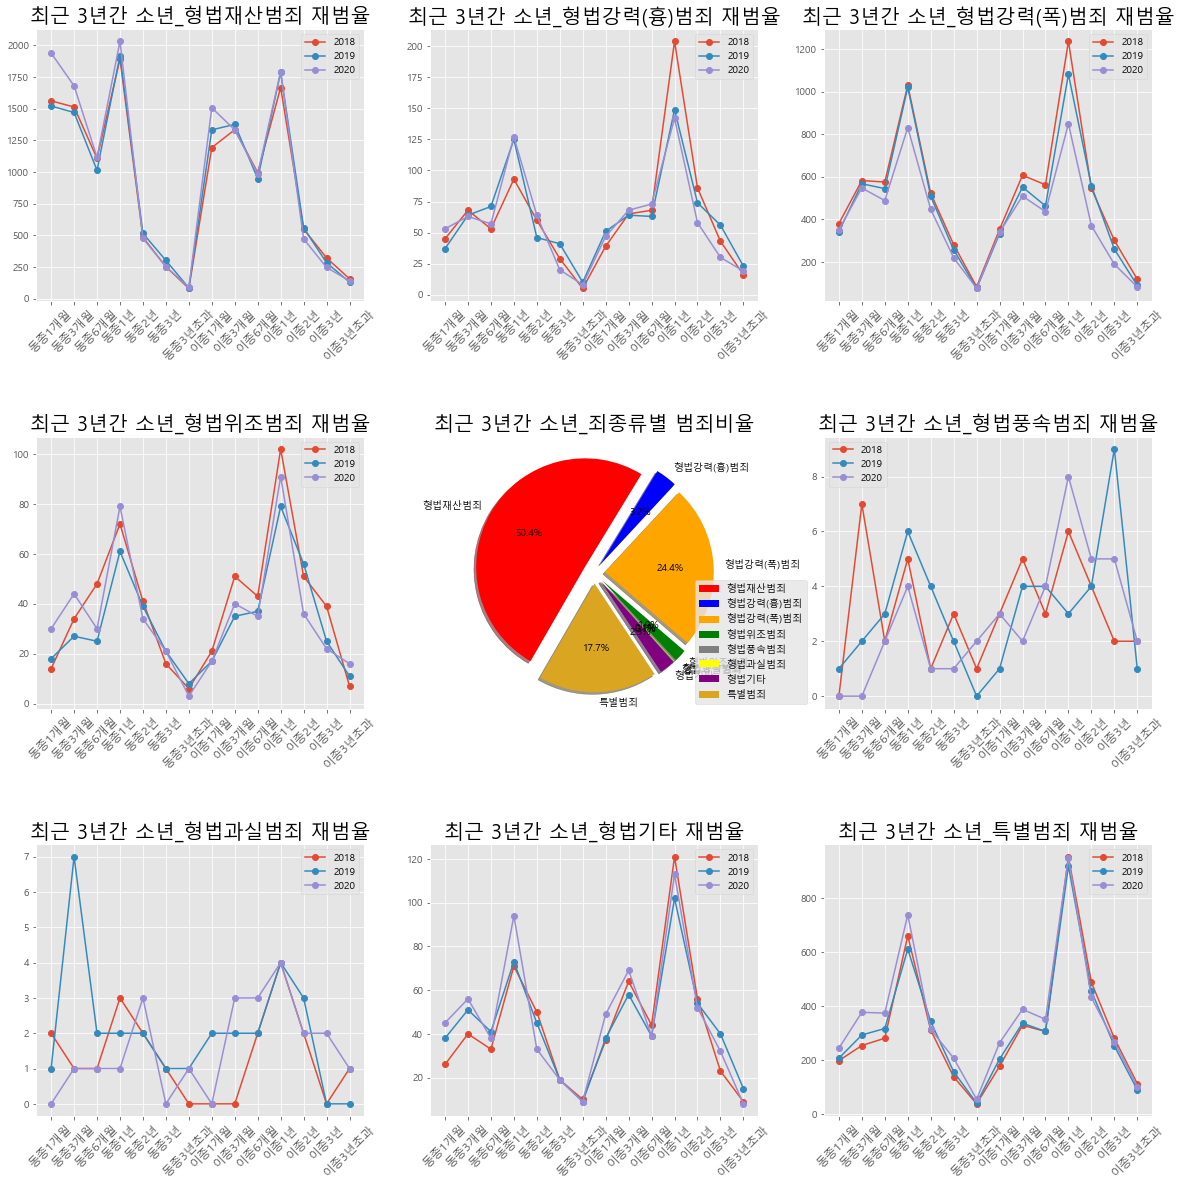

In [57]:
f, ax = plt.subplots(3, 3, figsize = (20, 20))
f.subplots_adjust(hspace=0.5)
color = ['red', 'blue', 'orange','green', 'gray', 'yellow','purple', 'goldenrod']
explode1 = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
ax[1, 1].pie(crimmeanall_sum[0], labels=list2, autopct='%.1f%%', colors=color,
        startangle=240, counterclock=False, explode=explode1, shadow=True)
ax[1, 1].legend(loc='lower right', bbox_to_anchor=(1.3,0.0))
ax[1, 1].set_title('최근 3년간 소년_죄종류별 범죄비율', fontsize=20)

for i in range(len(list2)):
    crim = globals()['crimall_{}_2018'.format(i)]
    crim2 = globals()['crimall_{}_2019'.format(i)]
    crim3 = globals()['crimall_{}_2020'.format(i)]
    if i == 0:
        ax[0, 0].plot(column, crim, marker='o',label='2018')
        ax[0, 0].plot(column, crim2, marker='o',label='2019')
        ax[0, 0].plot(column, crim3, marker='o',label='2020')
        ax[0, 0].legend()
        ax[0, 0].set_xticklabels(column, rotation=45, fontsize=12)
        ax[0, 0].set_title('최근 3년간 소년_{} 재범율'.format(list2[i]), fontsize=20)
    elif i == 1:
        ax[0, 1].plot(column, crim, marker='o',label='2018')
        ax[0, 1].plot(column, crim2, marker='o',label='2019')
        ax[0, 1].plot(column, crim3, marker='o',label='2020')
        ax[0, 1].legend()
        ax[0, 1].set_xticklabels(column, rotation=45, fontsize=12)
        ax[0, 1].set_title('최근 3년간 소년_{} 재범율'.format(list2[i]), fontsize=20)
    elif i == 2:
        ax[0, 2].plot(column, crim, marker='o',label='2018')
        ax[0, 2].plot(column, crim2, marker='o',label='2019')
        ax[0, 2].plot(column, crim3, marker='o',label='2020')
        ax[0, 2].legend()
        ax[0, 2].set_xticklabels(column, rotation=45, fontsize=12)
        ax[0, 2].set_title('최근 3년간 소년_{} 재범율'.format(list2[i]), fontsize=20)
    elif i == 3:
        ax[1, 0].plot(column, crim, marker='o',label='2018')
        ax[1, 0].plot(column, crim2, marker='o',label='2019')
        ax[1, 0].plot(column, crim3, marker='o',label='2020')
        ax[1, 0].legend()
        ax[1, 0].set_xticklabels(column, rotation=45, fontsize=12)
        ax[1, 0].set_title('최근 3년간 소년_{} 재범율'.format(list2[i]), fontsize=20)
    elif i == 4:
        ax[1, 2].plot(column, crim, marker='o',label='2018')
        ax[1, 2].plot(column, crim2, marker='o',label='2019')
        ax[1, 2].plot(column, crim3, marker='o',label='2020')
        ax[1, 2].legend()
        ax[1, 2].set_xticklabels(column, rotation=45, fontsize=12)
        ax[1, 2].set_title('최근 3년간 소년_{} 재범율'.format(list2[i]), fontsize=20)
    elif i == 5:
        ax[2, 0].plot(column, crim, marker='o',label='2018')
        ax[2, 0].plot(column, crim2, marker='o',label='2019')
        ax[2, 0].plot(column, crim3, marker='o',label='2020')
        ax[2, 0].legend()
        ax[2, 0].set_xticklabels(column, rotation=45, fontsize=12)
        ax[2, 0].set_title('최근 3년간 소년_{} 재범율'.format(list2[i]), fontsize=20)    
    elif i == 6:
        ax[2, 1].plot(column, crim, marker='o',label='2018')
        ax[2, 1].plot(column, crim2, marker='o',label='2019')
        ax[2, 1].plot(column, crim3, marker='o',label='2020')
        ax[2, 1].legend()
        ax[2, 1].set_xticklabels(column, rotation=45, fontsize=12)
        ax[2, 1].set_title('최근 3년간 소년_{} 재범율'.format(list2[i]), fontsize=20)   
    elif i == 7:
        ax[2, 2].plot(column, crim, marker='o',label='2018')
        ax[2, 2].plot(column, crim2, marker='o',label='2019')
        ax[2, 2].plot(column, crim3, marker='o',label='2020')
        ax[2, 2].legend()
        ax[2, 2].set_xticklabels(column, rotation=45, fontsize=12)
        ax[2, 2].set_title('최근 3년간 소년_{} 재범율'.format(list2[i]), fontsize=20)   

plt.savefig('data/범죄종류별_소년범죄_그래프.png')